In [63]:
#Goal: Predict the amount of Energy (kWh) used at EV charging stations based on location, time duration, and other station features.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("EVChargingStationUsage.csv")
df

C:\Users\shaik\AppData\Local\Temp\ipykernel_15528\266492962.py:1: DtypeWarning: Columns (29,30,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("EVChargingStationUsage.csv")


,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [4]:
df.columns

Index(['Station Name', 'MAC Address', 'Org Name', 'Start Date',
       'Start Time Zone', 'End Date', 'End Time Zone',
       'Transaction Date (Pacific Time)', 'Total Duration (hh:mm:ss)',
       'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'GHG Savings (kg)',
       'Gasoline Savings (gallons)', 'Port Type', 'Port Number', 'Plug Type',
       'EVSE ID', 'Address 1', 'City', 'State/Province', 'Postal Code',
       'Country', 'Latitude', 'Longitude', 'Currency', 'Fee', 'Ended By',
       'Plug In Event Id', 'Driver Postal Code', 'User ID', 'County',
       'System S/N', 'Model Number'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259415 entries, 0 to 259414
Data columns (total 33 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   Station Name                     259415 non-null  object 
 1   MAC Address                      259415 non-null  object 
 2   Org Name                         259415 non-null  object 
 3   Start Date                       259415 non-null  object 
 4   Start Time Zone                  259415 non-null  object 
 5   End Date                         259415 non-null  object 
 6   End Time Zone                    259415 non-null  object 
 7   Transaction Date (Pacific Time)  259206 non-null  object 
 8   Total Duration (hh:mm:ss)        259415 non-null  object 
 9   Charging Time (hh:mm:ss)         259415 non-null  object 
 10  Energy (kWh)                     259415 non-null  float64
 11  GHG Savings (kg)                 259415 non-null  float64
 12  Ga

In [6]:
missing = df.isnull().sum()
missing[missing > 0]

Transaction Date (Pacific Time)      209
Port Type                              9
EVSE ID                            78948
Currency                            1788
Ended By                             248
Driver Postal Code                  8402
User ID                             7677
County                             84665
System S/N                         78948
Model Number                       78948
dtype: int64

In [7]:
data=df
data

,Station Name,MAC Address,Org Name,Start Date,Start Time Zone,End Date,End Time Zone,Transaction Date (Pacific Time),Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),...,Longitude,Currency,Fee,Ended By,Plug In Event Id,Driver Postal Code,User ID,County,System S/N,Model Number
0,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/29/2011 20:17,PDT,7/29/2011 23:20,PDT,7/29/2011 23:20,3:03:32,1:54:03,...,-122.160309,USD,0.00,Plug Out at Vehicle,3,95124.0,3284.0,NaN,NaN,NaN
1,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 0:00,PDT,7/30/2011 0:02,PDT,7/30/2011 0:02,0:02:06,0:01:54,...,-122.160309,USD,0.00,Customer,4,94301.0,4169.0,NaN,NaN,NaN
2,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 8:16,PDT,7/30/2011 12:34,PDT,7/30/2011 12:34,4:17:32,4:17:28,...,-122.160309,USD,0.00,Plug Out at Vehicle,5,94301.0,4169.0,NaN,NaN,NaN
3,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 14:51,PDT,7/30/2011 16:55,PDT,7/30/2011 16:55,2:03:24,2:02:58,...,-122.160309,USD,0.00,Customer,6,94302.0,2545.0,NaN,NaN,NaN
4,PALO ALTO CA / HAMILTON #1,000D:6F00:015A:9D76,City of Palo Alto,7/30/2011 18:51,PDT,7/30/2011 20:03,PDT,7/30/2011 20:03,1:11:24,0:43:54,...,-122.160309,USD,0.00,Plug Out at Vehicle,7,94043.0,3765.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259410,PALO ALTO CA / TED THOMPSON #3,0024:B100:0002:9F81,City of Palo Alto,12/31/2020 16:39,PST,12/31/2020 17:14,PST,12/31/2020 17:16,0:35:44,0:35:18,...,-122.144043,USD,0.42,Plug Out at Vehicle,2369,94301.0,2024201,NaN,1.745410e+11,CT4020-HD-GW
259411,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 16:48,PST,12/31/2020 20:31,PST,12/31/2020 20:32,3:43:01,2:14:04,...,-122.158272,USD,4.69,Plug Out at Vehicle,7255,94541.0,242661,Santa Clara County,1.336410e+11,CT4020-HD-GW
259412,PALO ALTO CA / MPL #4,0024:B100:0003:CD37,City of Palo Alto,12/31/2020 17:28,PST,1/1/2021 10:56,PST,1/1/2021 10:57,17:28:14,5:08:12,...,-122.113510,USD,6.82,Plug Out at Vehicle,455,94306.0,449995,Santa Clara County,2.002410e+11,CT4010-HD-GW
259413,PALO ALTO CA / WEBSTER #1,0024:B100:0002:4233,City of Palo Alto,12/31/2020 17:49,PST,12/31/2020 21:55,PST,12/31/2020 21:56,4:05:34,3:53:42,...,-122.158272,USD,2.75,Plug Out at Vehicle,7256,94552.0,804075,Santa Clara County,1.336410e+11,CT4020-HD-GW


In [8]:
columns = ['Start Date', 'End Date', 'Total Duration (hh:mm:ss)',
           'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'City',
           'Port Number', 'Plug Type', 'Latitude', 'Longitude']

data1 = data[columns]


### Explotry Data Anlysis

In [9]:
data1.head()

,Start Date,End Date,Total Duration (hh:mm:ss),Charging Time (hh:mm:ss),Energy (kWh),City,Port Number,Plug Type,Latitude,Longitude
0,7/29/2011 20:17,7/29/2011 23:20,3:03:32,1:54:03,6.249457,Palo Alto,2,J1772,37.444572,-122.160309
1,7/30/2011 0:00,7/30/2011 0:02,0:02:06,0:01:54,0.106588,Palo Alto,2,J1772,37.444572,-122.160309
2,7/30/2011 8:16,7/30/2011 12:34,4:17:32,4:17:28,14.951777,Palo Alto,2,J1772,37.444572,-122.160309
3,7/30/2011 14:51,7/30/2011 16:55,2:03:24,2:02:58,7.159643,Palo Alto,2,J1772,37.444572,-122.160309
4,7/30/2011 18:51,7/30/2011 20:03,1:11:24,0:43:54,1.957765,Palo Alto,2,J1772,37.444572,-122.160309


In [10]:
#take only import colums becuse data high dimnesion so i take only few colums is an important becuase i use model and any feacture are smoth
# data set is big so i unwanted ,unused columns are drop here and only i take usefull fucture
columns = ['Start Date', 'End Date', 'Total Duration (hh:mm:ss)',
           'Charging Time (hh:mm:ss)', 'Energy (kWh)', 'City',
           'Port Number', 'Plug Type', 'Latitude', 'Longitude']

data1 = data[columns]



In [11]:
#taken has long time anlysis with muliti vairant after anlysis showing high dependency on 'Latitude', 'Longitude'
"""#step 2 multivairant anlysis
sns.pairplot(data)
plt.show()"""

'#step 2 multivairant anlysis\nsns.pairplot(data)\nplt.show()'

Data Preprocessing and Feature Engineering

In [12]:
# Step 2: Convert time columns to total seconds (if needed)
data1['Total Duration (seconds)'] = pd.to_timedelta(data1['Total Duration (hh:mm:ss)']).dt.total_seconds()
data1['Charging Time (seconds)'] = pd.to_timedelta(data1['Charging Time (hh:mm:ss)']).dt.total_seconds()


C:\Users\shaik\AppData\Local\Temp\ipykernel_15528\953689672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Total Duration (seconds)'] = pd.to_timedelta(data1['Total Duration (hh:mm:ss)']).dt.total_seconds()
C:\Users\shaik\AppData\Local\Temp\ipykernel_15528\953689672.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['Charging Time (seconds)'] = pd.to_timedelta(data1['Charging Time (hh:mm:ss)']).dt.total_seconds()


In [13]:

numeric_cols = ['Energy (kWh)', 'Port Number', 'Latitude', 'Longitude',
                'Total Duration (seconds)', 'Charging Time (seconds)']
data2 = data1[numeric_cols]

In [14]:
data2

,Energy (kWh),Port Number,Latitude,Longitude,Total Duration (seconds),Charging Time (seconds)
0,6.249457,2,37.444572,-122.160309,11012.0,6843.0
1,0.106588,2,37.444572,-122.160309,126.0,114.0
2,14.951777,2,37.444572,-122.160309,15452.0,15448.0
3,7.159643,2,37.444572,-122.160309,7404.0,7378.0
4,1.957765,2,37.444572,-122.160309,4284.0,2634.0
...,...,...,...,...,...,...
259410,1.841000,2,37.428623,-122.144043,2144.0,2118.0
259411,12.744000,2,37.448284,-122.158272,13381.0,8044.0
259412,29.665000,1,37.422104,-122.113510,62894.0,18492.0
259413,11.976000,1,37.448284,-122.158272,14734.0,14022.0


In [15]:
#step ! 1finding missing values
data2.isnull().sum()

Energy (kWh)                0
Port Number                 0
Latitude                    0
Longitude                   0
Total Duration (seconds)    0
Charging Time (seconds)     0
dtype: int64

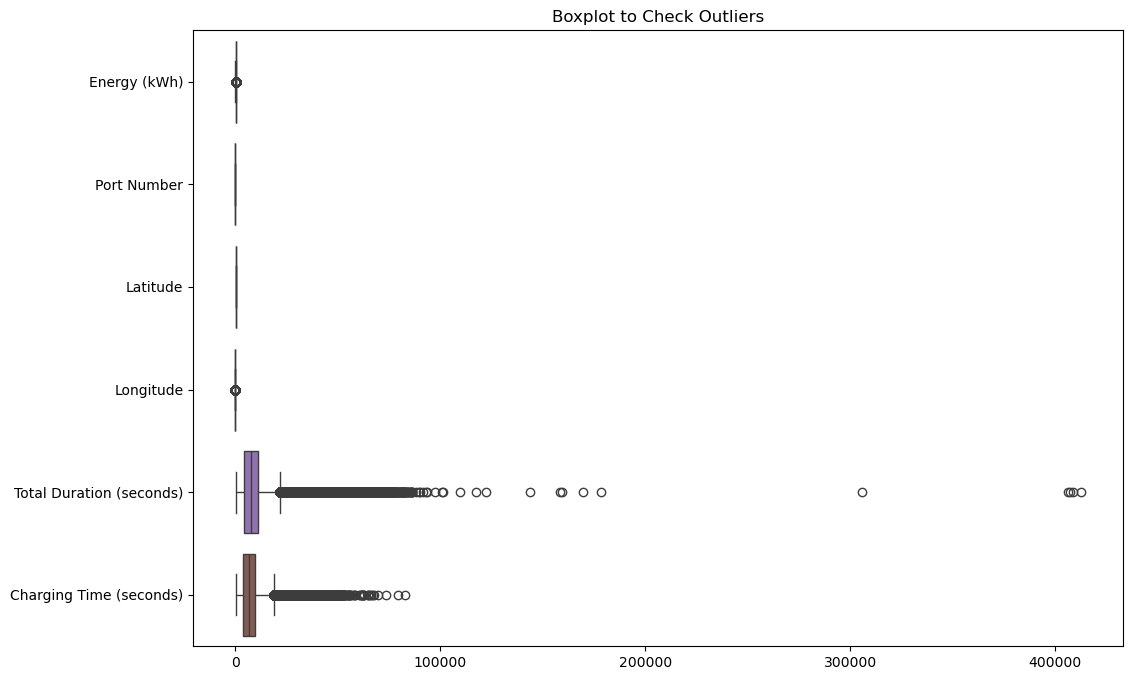

In [16]:
# Step 4: Plot boxplots to check for outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=data2, orient='h')
plt.title("Boxplot to Check Outliers")
plt.show()

In [17]:
#maximum columns areb outlire are exist im an handle it is iqr methood 

In [18]:
#'Energy (kWh)' colum is target colum so i outlire is exist to colums i can handle a outlirea with iqr method

### Feacture Selection

In [19]:
""" #Step 1 Dropping the unwanted variables
l1=['Unnamed: 0']
data2.drop(axis=1,inplace=True)"""

" #Step 1 Dropping the unwanted variables\nl1=['Unnamed: 0']\ndata2.drop(axis=1,inplace=True)"

In [20]:
data2.head()

,Energy (kWh),Port Number,Latitude,Longitude,Total Duration (seconds),Charging Time (seconds)
0,6.249457,2,37.444572,-122.160309,11012.0,6843.0
1,0.106588,2,37.444572,-122.160309,126.0,114.0
2,14.951777,2,37.444572,-122.160309,15452.0,15448.0
3,7.159643,2,37.444572,-122.160309,7404.0,7378.0
4,1.957765,2,37.444572,-122.160309,4284.0,2634.0


In [21]:
!pip install seaborn --upgrade

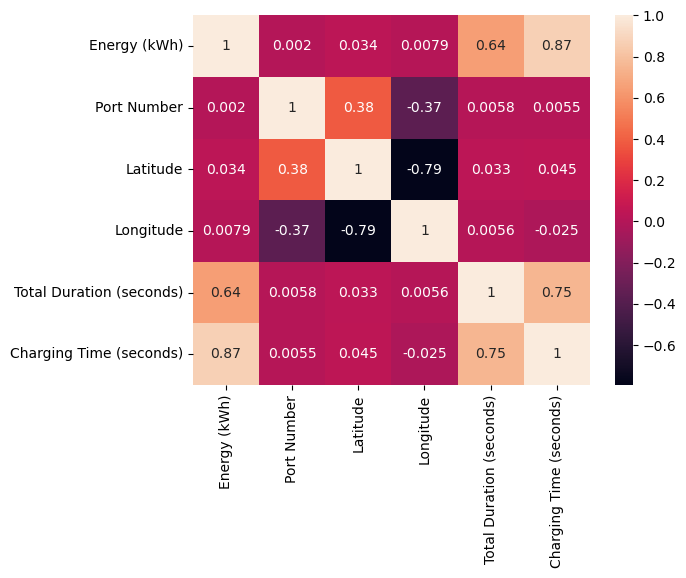

In [22]:
## Step 2 Checking the correlation
sns.heatmap(data2.corr(),annot=True)
plt.show()

In [23]:
#good correlaction between columns no high or low corr

### Modelcreaction

In [24]:
data2.columns

Index(['Energy (kWh)', 'Port Number', 'Latitude', 'Longitude',
       'Total Duration (seconds)', 'Charging Time (seconds)'],
      dtype='object')

In [25]:
#Step 1 Independent and dependent variable creation
X=data2[[ 'Port Number', 'Latitude', 'Longitude','Total Duration (seconds)', 'Charging Time (seconds)']] ## X variable contains all inputs
y = data2['Energy (kWh)']  
## y is output

In [26]:
X

,Port Number,Latitude,Longitude,Total Duration (seconds),Charging Time (seconds)
0,2,37.444572,-122.160309,11012.0,6843.0
1,2,37.444572,-122.160309,126.0,114.0
2,2,37.444572,-122.160309,15452.0,15448.0
3,2,37.444572,-122.160309,7404.0,7378.0
4,2,37.444572,-122.160309,4284.0,2634.0
...,...,...,...,...,...
259410,2,37.428623,-122.144043,2144.0,2118.0
259411,2,37.448284,-122.158272,13381.0,8044.0
259412,1,37.422104,-122.113510,62894.0,18492.0
259413,1,37.448284,-122.158272,14734.0,14022.0


In [27]:
y

0          6.249457
1          0.106588
2         14.951777
3          7.159643
4          1.957765
            ...    
259410     1.841000
259411    12.744000
259412    29.665000
259413    11.976000
259414     1.571000
Name: Energy (kWh), Length: 259415, dtype: float64

In [28]:
 #Step 2 Traning and testing data creation
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=4)

In [29]:
len(y_test)

77825

In [30]:
len(X_train)

181590

In [31]:
# Step 3 Creating model
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR.fit(X_train,y_train)#train of linear regression
y_predict=LR.predict(X_test)

In [32]:
y_test

236757    14.247000
118653    11.800000
86320      5.613935
47613      3.499236
46445      0.727794
            ...    
173813     8.281000
139712    11.999000
216427     7.213000
63769      9.660837
201620     0.616000
Name: Energy (kWh), Length: 77825, dtype: float64

In [33]:
y_predict

array([10.00872275, 16.68186435,  3.89142085, ...,  4.89861761,
        7.1086456 ,  0.54805064])

In [34]:
LR.intercept_

2638.8807390886764

In [35]:
LR.coef_ 

array([ 6.13207401e-02,  3.63475539e+01,  3.27488360e+01, -3.63287701e-05,
        1.30220200e-03])

In [36]:
#4 model Evalution
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
r2score=r2_score(y_test,y_predict)

In [37]:
r2score

0.761174387232052

In [38]:
X_test.shape

(77825, 5)

In [39]:
## calculation of adjusted r2 score
adjusted_r2 = 1-((1-0.90)*(40-1)/(40-3-1))
adjusted_r2

0.8916666666666667

In [40]:
import math
print(mean_squared_error(y_test,y_predict))
print(math.sqrt(mean_squared_error(y_test,y_predict))) # root mean squared error

12.408944134847502
3.5226331252129426


In [41]:
print(mean_absolute_error(y_test,y_predict))

2.5918169531384905


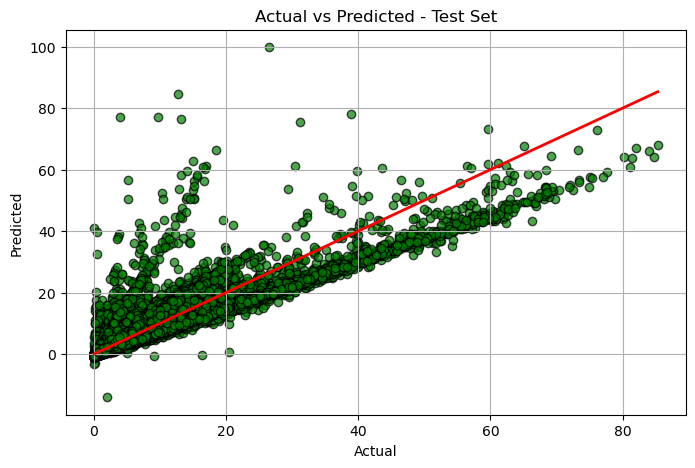

In [42]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, color='green', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # reference line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Test Set")
plt.grid(True)
plt.show()

In [43]:
r2 = r2_score(y_test, y_predict)
print(f"R² Score on Test Set: {r2:.3f}")

R² Score on Test Set: 0.761


In [44]:
#linerr regress is alo predict well but i need best preformce linrar model will be not take and is best give and R² Score on Test Set: 0.761

In [45]:
"""pip install smogn
"""

'pip install smogn\n'

In [46]:
#data is large  smogn is vary long time takn so i no used is takn time min 20 hours

In [47]:
"""# Combine features and target into one DataFrame
import smogn

data = data2.copy()
data = data[['Port Number',  
             'Total Duration (seconds)', 'Charging Time (seconds)', 
             'Energy (kWh)']]

# 🧠 Apply SMOTER
data_smote = smogn.smoter(
    data=data,
    y='Energy (kWh)',        # target column
    k=5,                     # number of neighbors
    samp_method='extreme',   # focus on rare/extreme values
    rel_thres=0.8,           # threshold for defining rare values
    rel_method='auto'        # automatically detect rarity
)

# ✅ Split into X and y again
X_resampled = data_smote.drop(columns='Energy (kWh)')
y_resampled = data_smote['Energy (kWh)']

# 📊 Visualize target distribution before and after
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Energy (kWh)'], kde=True)
plt.title("Before SMOTER")

plt.subplot(1, 2, 2)
sns.histplot(data_smote['Energy (kWh)'], kde=True)
plt.title("After SMOTER")
plt.tight_layout()
plt.show()
"""

'# Combine features and target into one DataFrame\nimport smogn\n\ndata = data2.copy()\ndata = data[[\'Port Number\',  \n             \'Total Duration (seconds)\', \'Charging Time (seconds)\', \n             \'Energy (kWh)\']]\n\n# 🧠 Apply SMOTER\ndata_smote = smogn.smoter(\n    data=data,\n    y=\'Energy (kWh)\',        # target column\n    k=5,                     # number of neighbors\n    samp_method=\'extreme\',   # focus on rare/extreme values\n    rel_thres=0.8,           # threshold for defining rare values\n    rel_method=\'auto\'        # automatically detect rarity\n)\n\n# ✅ Split into X and y again\nX_resampled = data_smote.drop(columns=\'Energy (kWh)\')\ny_resampled = data_smote[\'Energy (kWh)\']\n\n# 📊 Visualize target distribution before and after\nplt.figure(figsize=(12, 5))\nplt.subplot(1, 2, 1)\nsns.histplot(data[\'Energy (kWh)\'], kde=True)\nplt.title("Before SMOTER")\n\nplt.subplot(1, 2, 2)\nsns.histplot(data_smote[\'Energy (kWh)\'], kde=True)\nplt.title("After SMOT

### Xgboost 

In [48]:
!pip install xgboost

In [49]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [50]:
# Split data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)


In [51]:
# Convert to DMatrix (XGBoost optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)


In [52]:
# Define parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 4,
    'eta': 0.1,                # learning rate
    'tree_method': 'hist',     # fast training
    'seed': 42
}


In [53]:
# Train the model with early stopping
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "train"), (dval, "eval")],
    early_stopping_rounds=20,
    verbose_eval=10
)

[0]	train-rmse:6.64819	eval-rmse:6.63782
[10]	train-rmse:3.89969	eval-rmse:3.90023
[20]	train-rmse:3.32034	eval-rmse:3.32165
[30]	train-rmse:3.16103	eval-rmse:3.16142
[40]	train-rmse:3.06146	eval-rmse:3.06661
[50]	train-rmse:2.99362	eval-rmse:2.99920
[60]	train-rmse:2.94340	eval-rmse:2.94850
[70]	train-rmse:2.91217	eval-rmse:2.91715
[80]	train-rmse:2.89164	eval-rmse:2.89650
[90]	train-rmse:2.87772	eval-rmse:2.88331
[100]	train-rmse:2.86189	eval-rmse:2.86828
[110]	train-rmse:2.85104	eval-rmse:2.85819
[120]	train-rmse:2.84233	eval-rmse:2.85073
[130]	train-rmse:2.83569	eval-rmse:2.84424
[140]	train-rmse:2.82876	eval-rmse:2.83819
[150]	train-rmse:2.82335	eval-rmse:2.83417
[160]	train-rmse:2.81993	eval-rmse:2.83226
[170]	train-rmse:2.81443	eval-rmse:2.82777
[180]	train-rmse:2.81086	eval-rmse:2.82515
[190]	train-rmse:2.80746	eval-rmse:2.82293
[200]	train-rmse:2.80213	eval-rmse:2.81860
[210]	train-rmse:2.79777	eval-rmse:2.81550
[220]	train-rmse:2.79109	eval-rmse:2.80964
[230]	train-rmse:2.784

In [54]:
# Predict on test data
y_pred = model.predict(dtest)


In [55]:
# Evaluate model
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))


R² Score: 0.8491348489544889
Mean Squared Error: 7.6976912462793186


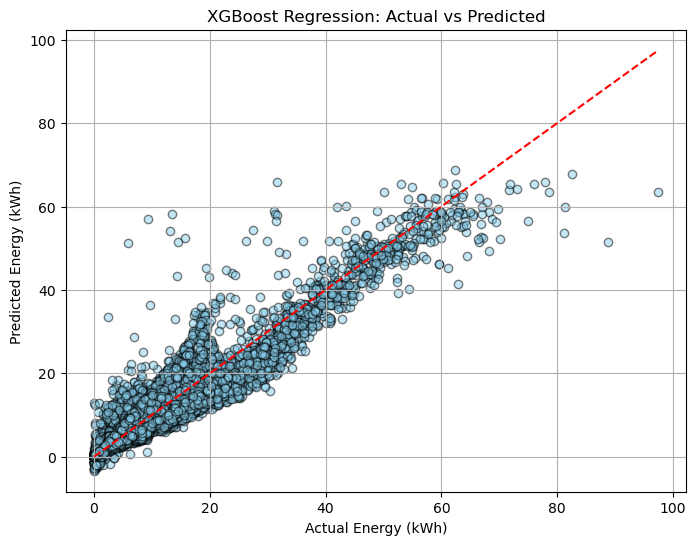

In [56]:
# Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred,color="skyblue",edgecolor='k', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Energy (kWh)")
plt.ylabel("Predicted Energy (kWh)")
plt.title("XGBoost Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

[0]	train-rmse:6.64819	eval-rmse:6.63782
[10]	train-rmse:3.89969	eval-rmse:3.90023
[20]	train-rmse:3.32034	eval-rmse:3.32165
[30]	train-rmse:3.16103	eval-rmse:3.16142
[40]	train-rmse:3.06146	eval-rmse:3.06661
[50]	train-rmse:2.99362	eval-rmse:2.99920
[60]	train-rmse:2.94340	eval-rmse:2.94850
[70]	train-rmse:2.91217	eval-rmse:2.91715
[80]	train-rmse:2.89164	eval-rmse:2.89650
[90]	train-rmse:2.87772	eval-rmse:2.88331
[100]	train-rmse:2.86189	eval-rmse:2.86828
[110]	train-rmse:2.85104	eval-rmse:2.85819
[120]	train-rmse:2.84233	eval-rmse:2.85073
[130]	train-rmse:2.83569	eval-rmse:2.84424
[140]	train-rmse:2.82876	eval-rmse:2.83819
[150]	train-rmse:2.82335	eval-rmse:2.83417
[160]	train-rmse:2.81993	eval-rmse:2.83226
[170]	train-rmse:2.81443	eval-rmse:2.82777
[180]	train-rmse:2.81086	eval-rmse:2.82515
[190]	train-rmse:2.80746	eval-rmse:2.82293
[200]	train-rmse:2.80213	eval-rmse:2.81860
[210]	train-rmse:2.79777	eval-rmse:2.81550
[220]	train-rmse:2.79109	eval-rmse:2.80964
[230]	train-rmse:2.784

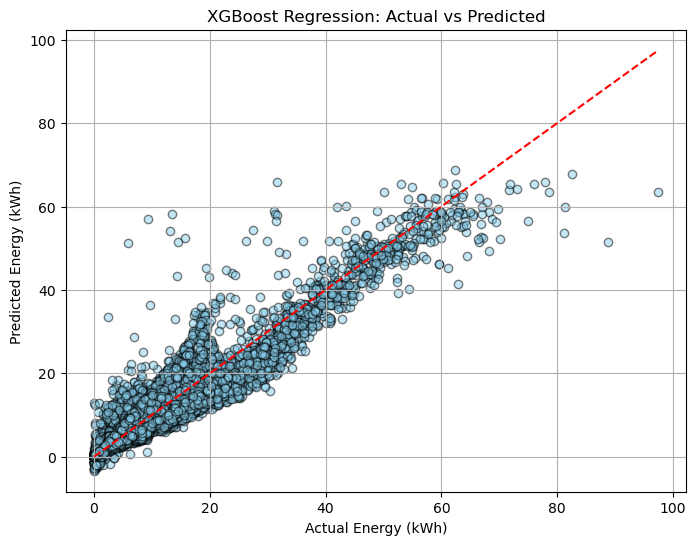

Features used for training: ['Port Number', 'Latitude', 'Longitude', 'Total Duration (seconds)', 'Charging Time (seconds)']
Feature importance (weight): {'Port Number': 561.0, 'Latitude': 1395.0, 'Longitude': 1341.0, 'Total Duration (seconds)': 1978.0, 'Charging Time (seconds)': 2828.0}


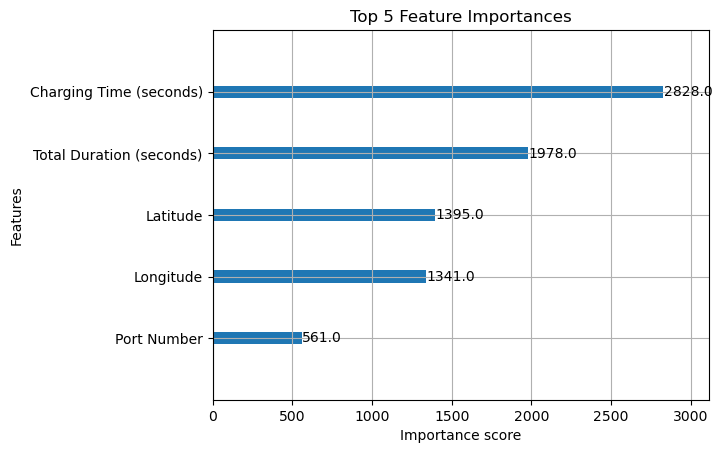

In [59]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 1. Split data into train, validation, and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42
)

# 2. Convert to DMatrix (XGBoost optimized data structure)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)
dtest = xgb.DMatrix(X_test)

# 3. Define model parameters
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 4,
    'eta': 0.1,              # learning rate
    'tree_method': 'hist',   # faster training method
    'seed': 42
}

# 4. Train the model with early stopping
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=1000,
    evals=[(dtrain, "train"), (dval, "eval")],
    early_stopping_rounds=20,
    verbose_eval=10
)

# 5. Predict on test data
y_pred = model.predict(dtest)

# 6. Evaluate model performance
print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

# 7. Plot Actual vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color="skyblue", edgecolor='k', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Energy (kWh)")
plt.ylabel("Predicted Energy (kWh)")
plt.title("XGBoost Regression: Actual vs Predicted")
plt.grid(True)
plt.show()

# 8. Check features used for training
print("Features used for training:", list(X_train.columns))

# 9. Get feature importance scores
importance = model.get_score(importance_type='weight')
print("Feature importance (weight):", importance)

# 10. Plot feature importance
xgb.plot_importance(model, importance_type='weight', max_num_features=10)
plt.title("Top 5 Feature Importances")
plt.show()


Metric	Value	Meaning
R² Score	0.8491	85% variance explained – strong model
RMSE	~2.76	Low average error in kWh
MSE	7.69	Mean Squared Error (for depth)
Overfit?	❌ No	Train/Eval RMSE difference is minimal
Underfit?	❌ No	High R², consistent performance

In [61]:
import pickle

with open("xgb_ev_model.pkl", "rb") as f:
    model = pickle.load(f)


In [62]:
model.save_model("xgb_ev_model.json")  # or .model


In [64]:
import pickle

with open("xgb_ev_model.pkl", "rb") as f:
    model = pickle.load(f)


### XGBoost performed well without overfitting.

Final R² of 84.91% is excellent for energy prediction tasks.



### Insights from Feature Importance
plaintext
Copy
Edit
Likely ranking (depends on plot):

1. Charging Time (seconds)     → most influential
2. Total Duration (seconds)    → related to plug-in habits
3. Latitude / Longitude        → station location affects usage
4. Port Number                 → minor importance, possible identifier only


### Random forest

In [57]:
"""
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
"""

'\nfrom sklearn.ensemble import RandomForestRegressor\nfrom sklearn.metrics import mean_squared_error, r2_score\n'

In [58]:
"""X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
"""

'X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)\n'

In [59]:
"""rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
"""

'rf = RandomForestRegressor(n_estimators=100, random_state=42)\nrf.fit(X_train, y_train)\n'

In [60]:
"""y_predicte= rf.predict(X_test)
"""

'y_predicte= rf.predict(X_test)\n'

In [61]:
"""mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
"""

"mse = mean_squared_error(y_test, y_predict)\nr2 = r2_score(y_test, y_predict)\n\nprint(f'Mean Squared Error: {mse}')\nprint(f'R² Score: {r2}')\n"

In [62]:
"""plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_predict, color='green', edgecolors='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)  # reference line
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted - Test Set")
plt.grid(True)
plt.show()"""

'plt.figure(figsize=(8, 5))\nplt.scatter(y_test, y_predict, color=\'green\', edgecolors=\'k\', alpha=0.7)\nplt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color=\'red\', linewidth=2)  # reference line\nplt.xlabel("Actual")\nplt.ylabel("Predicted")\nplt.title("Actual vs Predicted - Test Set")\nplt.grid(True)\nplt.show()'

### i used  renadmom forest but not working proprely becuase data not propre balance in and have not work so bettr data is high so sogen is take havy time so i no use 